# Data Pre-Processing and Cleaning

## Library Imports

In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Load DataSet

In [19]:
current_dir = os.getcwd()
sim2024_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'F124 Data Export UNSW.csv'))
sim2023_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-data-2023.csv'))
sim2022_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-data-2022.csv'))
sim_left_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-left.csv'))
sim_right_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-right.csv'))
sim_turns_df = pd.read_csv(os.path.join(current_dir, '..', 'raw_data', 'f1sim-ref-turns.csv'))

c:\Users\keywo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Cleaning and Filtering

### Combine 2022 and 2023 data

In [20]:
f1sim_df = pd.concat([sim2022_df, sim2023_df], ignore_index=True)

### Filter on Start Line to Turn 3 Entry Point

In [21]:
# Filter on sector 0 first to reduce some rows
f1sim_sector0_df = f1sim_df[f1sim_df["SECTOR"] == 0]

In [22]:
# Ensure the positional distance the car as travelled over the track is below 1158 metres (which is the positional distance of entry to Turn 3)
f1sim_filtered_df = f1sim_sector0_df[f1sim_sector0_df["LAP_DISTANCE"] < 1158]
f1sim_filtered_df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,...,ROLL,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ
0,1.004555e+19,1403,1,0,243.045959,2844,29433,18320,86008.0,38255.0,...,-0.023934,287.412811,298.471619,1.760029,-24167.0,-12.0,-22126.0,22120.0,784.0,-24160.0
1,1.004555e+19,1408,1,0,266.444916,3111,29433,18320,86008.0,38255.0,...,-0.021614,304.667603,282.659576,1.781548,-23858.0,105.0,-22460.0,22456.0,708.0,-23851.0
2,1.004555e+19,1416,1,0,297.438477,3486,29433,18320,86008.0,38255.0,...,-0.018019,326.941986,261.094025,1.882867,-23467.0,101.0,-22867.0,22865.0,590.0,-23462.0
3,1.004555e+19,1418,1,0,306.238770,3603,29433,18320,86008.0,38255.0,...,-0.015977,333.254730,254.958725,1.920085,-23584.0,172.0,-22747.0,22746.0,523.0,-23579.0
4,1.004555e+19,1470,1,0,441.464752,6106,29433,18320,86008.0,38255.0,...,-0.012085,370.639648,141.009048,2.337044,10302.0,-150.0,-31104.0,31103.0,395.0,10300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853828,9.922656e+18,3845,2,0,1153.107422,20587,36499,22353,102385.0,43533.0,...,-0.026105,706.021301,-433.571320,2.848758,26458.0,-521.0,-19322.0,19329.0,855.0,26444.0
1853829,9.922656e+18,3846,2,0,1154.201660,20637,36499,22353,102385.0,43533.0,...,-0.026407,704.912598,-434.376434,2.828011,26807.0,-602.0,-18832.0,18841.0,865.0,26793.0
1853830,9.922656e+18,3847,2,0,1155.273438,20687,36499,22353,102385.0,43533.0,...,-0.031669,703.808167,-435.149231,2.803751,27185.0,-609.0,-18282.0,18292.0,1037.0,27165.0
1853831,9.922656e+18,3848,2,0,1156.328125,20737,36499,22353,102385.0,43533.0,...,-0.035166,702.703247,-435.889160,2.777668,27560.0,-621.0,-17711.0,17721.0,1151.0,27537.0


### Frame Rates - remove slow frame rates

We will use the average frame rate per second as the baseline and only consider laps with a frame lap bigger than the average. (happens to be around 12.6 - so we will filter to be greater than 12)

      SESSION_IDENTIFIER  LAP_NUM  AVG_TIME_PER_FRAME_MS  AVG_FRAME_RATE_FPS
0           5.892042e+16        1              55.357367           18.064443
1           5.892042e+16        2              55.130303           18.138845
2           9.718583e+16        1              50.002747           19.998901
3           9.718583e+16        2              50.145299           19.942049
4           9.718583e+16        3              50.002786           19.998886
...                  ...      ...                    ...                 ...
1348        1.834959e+19        2              50.071527           19.971430
1349        1.839489e+19        1              55.378313           18.057610
1350        1.839489e+19        2              56.157996           17.806903
1351        1.843892e+19        1              70.604478           14.163408
1352        1.843892e+19        2              60.226667           16.603941

[1353 rows x 4 columns]
12.672040014433728
9.035166661977794


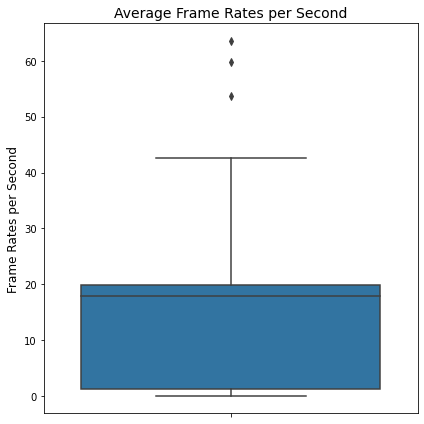

In [23]:
# Frame Rates
import seaborn as sns
frame_counts = f1sim_filtered_df.groupby(['SESSION_IDENTIFIER', 'LAP_NUM']).size().reset_index(name='FRAME_COUNT')

# Assuming 'df' is the DataFrame
# Sort by session and frame to ensure correct frame sequencing
df_sorted = f1sim_filtered_df.sort_values(by=['SESSION_IDENTIFIER', 'FRAME'])

# Calculate the time difference between consecutive frames within the same session
df_sorted['TIME_DIFF_MS'] = df_sorted.groupby(['SESSION_IDENTIFIER', 'LAP_NUM'])['CURRENT_LAP_TIME_MS'].diff()

# Drop rows where the time difference is NaN (the first frame in each session group)
df_sorted = df_sorted.dropna(subset=['TIME_DIFF_MS'])

# Calculate the average time per frame in milliseconds for each session
average_time_per_frame_ms = df_sorted.groupby(['SESSION_IDENTIFIER', 'LAP_NUM'])['TIME_DIFF_MS'].mean().reset_index(name='AVG_TIME_PER_FRAME_MS')

# Convert the average time per frame from milliseconds to seconds
average_time_per_frame_s = average_time_per_frame_ms['AVG_TIME_PER_FRAME_MS'] / 1000

# Calculate the average frame rate (frames per second)
average_frame_rate = 1 / average_time_per_frame_s

# Add the frame rate to the DataFrame
average_time_per_frame_ms['AVG_FRAME_RATE_FPS'] = average_frame_rate

# Display the result
print(average_time_per_frame_ms)

filtered_df = average_time_per_frame_ms[average_time_per_frame_ms['AVG_FRAME_RATE_FPS'] > 12]

mean_value = average_time_per_frame_ms['AVG_FRAME_RATE_FPS'].mean()
std_deviation = average_time_per_frame_ms['AVG_FRAME_RATE_FPS'].std()

print(mean_value)
print(std_deviation)

plt.figure(figsize=(6, 6))

# Create a single box plot for the aggregated maximum speeds
sns.boxplot(y='AVG_FRAME_RATE_FPS', data=average_time_per_frame_ms)

# Customize the plot
plt.title('Average Frame Rates per Second', fontsize=14)
plt.ylabel('Frame Rates per Second', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
f1sim_filtered_df = f1sim_filtered_df[f1sim_filtered_df["SESSION_IDENTIFIER"].isin(list(filtered_df["SESSION_IDENTIFIER"]))]

### Current Lap Time - filter out slow laps for the target Track Section

In [25]:
result = f1sim_filtered_df.loc[f1sim_filtered_df.groupby(['SESSION_IDENTIFIER', 'LAP_NUM'])['FRAME'].idxmax()]
result["TIME_S"] = result["CURRENT_LAP_TIME_MS"].apply(lambda x: x/1000)

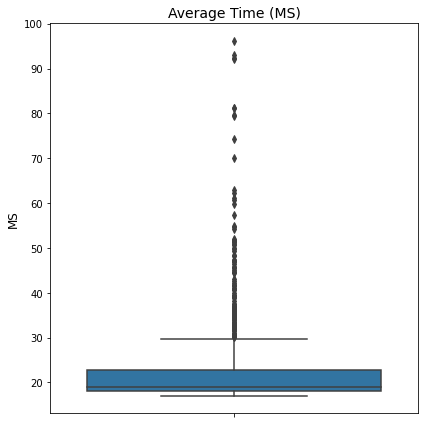

In [26]:
plt.figure(figsize=(6, 6))

# Create a single box plot for the aggregated maximum speeds
sns.boxplot(y='TIME_S', data=result)

# Customize the plot
plt.title('Average Time (MS)', fontsize=14)
plt.ylabel('MS', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [27]:
result["TIME_S"].describe()

count    871.000000
mean      22.917462
std       10.135066
min       17.083000
25%       18.034000
50%       19.060000
75%       22.847500
max       96.104000
Name: TIME_S, dtype: float64

In [28]:
# We will filter on the 3rd Quartile (retaining 75% of the data)
result = result[result["TIME_S"] < 23]
f1sim_filtered_df = f1sim_filtered_df[f1sim_filtered_df["SESSION_IDENTIFIER"].isin(list(result["SESSION_IDENTIFIER"]))]


In [29]:
result

,SESSION_IDENTIFIER,FRAME,LAP_NUM,SECTOR,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SECTOR_1_TIME_MS,SECTOR_2_TIME_MS,LAP_TIME_MS,SECTOR_3_MS,...,WORLDPOSX,WORLDPOSY,WORLDPOSZ,WORLDFORWARDDIRX,WORLDFORWARDDIRY,WORLDFORWARDDIRZ,WORLDRIGHTDIRX,WORLDRIGHTDIRY,WORLDRIGHTDIRZ,TIME_S
547233,5.892042e+16,1122,1,0,1157.536499,17659,31444,19019,87429.0,36966.0,...,702.003540,-439.528961,2.670550,27333.0,-469.0,-18064.0,18070.0,788.0,27322.0,17.659
548824,5.892042e+16,3124,2,0,1157.422852,18193,28680,18786,84470.0,37004.0,...,698.350403,-421.403809,3.064989,31291.0,-3.0,-9722.0,9721.0,-447.0,31288.0,18.193
1837267,9.718583e+16,1368,1,0,1157.687988,18201,29793,18287,94549.0,46469.0,...,698.193665,-422.034302,3.063085,32535.0,-166.0,-3884.0,3883.0,-222.0,32535.0,18.201
1839145,9.718583e+16,3253,2,0,1157.137695,17634,28837,18406,82927.0,35684.0,...,698.266113,-419.736145,3.012787,31857.0,-78.0,-7665.0,7660.0,-936.0,31845.0,17.634
1840797,9.718583e+16,4925,3,0,1157.781250,17951,28998,18086,83016.0,35932.0,...,697.939941,-421.297394,3.049342,32571.0,-296.0,-3559.0,3554.0,-529.0,32569.0,17.951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348285,1.797894e+19,8929,2,0,1156.484863,18551,30767,19525,87277.0,36985.0,...,698.963257,-419.816589,3.034220,31466.0,-13.0,-9140.0,9136.0,-1001.0,31451.0,18.551
349803,1.797894e+19,10771,3,0,1156.795898,18084,29821,19871,86664.0,36972.0,...,699.021729,-421.370483,3.068578,31595.0,27.0,-8684.0,8684.0,-454.0,31592.0,18.084
353534,1.822200e+19,1987,1,0,1156.707886,18935,31795,18694,94084.0,43595.0,...,701.189270,-430.986542,2.913516,28111.0,-421.0,-16829.0,16834.0,662.0,28104.0,18.935
355235,1.822200e+19,4169,2,0,1157.973633,19144,30300,19573,92846.0,42973.0,...,697.794678,-421.601166,3.062512,31210.0,3.0,-9979.0,9979.0,-276.0,31209.0,19.144


In [30]:
f1sim_filtered_df["LAP_ID"] = f1sim_filtered_df["SESSION_IDENTIFIER"].astype(str) + "_" + f1sim_filtered_df["LAP_NUM"].astype(str)

# These two laps present problems - not enough data points across our desired area of the track
f1sim_filtered_df = f1sim_filtered_df[f1sim_filtered_df["LAP_ID"] != '4.486621736790789e+18_3']
f1sim_filtered_df = f1sim_filtered_df[f1sim_filtered_df["LAP_ID"] != '6.62748209755241e+18_1']

### Remove unncessary columns

In [31]:
f1sim_clean_df = f1sim_filtered_df[[
    "SESSION_IDENTIFIER", 
    "FRAME", 
    "LAP_NUM", 
    "LAP_DISTANCE", 
    "CURRENT_LAP_TIME_MS", 
    "SPEED_KPH", 
    "THROTTLE", 
    "BRAKE",
    "STEERING", 
    "WORLDPOSX", 
    "WORLDPOSY",
    "LAP_ID"
    ]]

f1sim_clean_df = f1sim_clean_df.reset_index(drop=True)

In [32]:
f1sim_clean_df

,SESSION_IDENTIFIER,FRAME,LAP_NUM,LAP_DISTANCE,CURRENT_LAP_TIME_MS,SPEED_KPH,THROTTLE,BRAKE,STEERING,WORLDPOSX,WORLDPOSY,LAP_ID
0,1.004645e+19,1652,1,0.580389,0,289.0,0.998413,0.0,0.002243,111.150146,464.910126,1.0046447013921722e+19_1
1,1.004645e+19,1653,1,4.607213,50,290.0,0.998413,0.0,0.001144,114.049080,462.116333,1.0046447013921722e+19_1
2,1.004645e+19,1655,1,9.989393,116,290.0,0.998413,0.0,-0.002426,117.922577,458.380981,1.0046447013921722e+19_1
3,1.004645e+19,1657,1,14.036831,166,290.0,0.988968,0.0,-0.002518,120.835716,455.572235,1.0046447013921722e+19_1
4,1.004645e+19,1659,1,18.079540,216,291.0,0.973739,0.0,-0.003250,123.746330,452.767700,1.0046447013921722e+19_1
...,...,...,...,...,...,...,...,...,...,...,...,...
294588,9.922656e+18,3845,2,1153.107422,20587,98.0,0.102373,0.0,0.727443,706.021301,-433.571320,9.922655568079577e+18_2
294589,9.922656e+18,3846,2,1154.201660,20637,97.0,0.101305,0.0,0.725612,704.912598,-434.376434,9.922655568079577e+18_2
294590,9.922656e+18,3847,2,1155.273438,20687,96.0,0.128756,0.0,0.723781,703.808167,-435.149231,9.922655568079577e+18_2
294591,9.922656e+18,3848,2,1156.328125,20737,95.0,0.000000,0.0,0.724056,702.703247,-435.889160,9.922655568079577e+18_2


## Save Cleaned DataSet 

In [33]:
f1sim_clean_df = f1sim_clean_df.reset_index(drop=True)
f1sim_clean_df.to_csv(os.path.join(current_dir, '..', 'processed_data', 'f1sim_combined.csv'))